# Lab 7 - oscillations and Fourier spectra 

## BIOS 26210 (fall 2022)

### Keegan Ballantyne

In [100]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint
import pandas as pd

### Assignment Overview:

In this week's lab we will solve the harmonic oscillator ODE and analyze oscillatory behavior using Fourier transforms. In part 1, we will solve the harmonic oscillator with damping for different parameter values. In part 2, we apply Fourier transforms to the solutions and interpret them. In part 3, we apply FT to a real data set and interpret the results.

## Part 1: Harmonic oscillator with damping

We can write the 2nd order harmonic oscillator ODE with damping using the force equation $F = ma$: 

$$m \ddot x  = -k x - b \dot x$$

It can be represented by two 1st order ODEs, with $x$ representing displacement and $y$ representing velocity of the harmonic oscillator, and setting mass $m=1$:

$$ \dot y = -k x - b \dot y$$
$$ \dot x = y $$

Take your function for solving 2-variable ODEs from part 2 of lab 6 and modify it to represent the harmonic oscillator ODE above (remember to change all the parameters to match the ones used in this ODE.) Create a function that will do the following (see example from lab7_examples.ipynb to get started):

* INPUT: parameters of the harmonic osillator ODE, x and y limits of the phase plane, grid spacing, Tmax, dt, x initial value, y initial value
* DO:
    - create a phase portrait of the harmonic oscillator ODE using the input parameters
    - plot the solution trajectories on the phase portrait, using the vectors of initial x and y values (use a for loop, like you did in lab 6)
    - plot the solutions for x (displacement) using the same initial values as a function of time
    - Calulate the eigenvalues of the defining matrix of the 2-variable ODE
* OUTPUT: eigenvalues of the defining matrix, solution of displacement (x), time array (t)

Use this function for the following paramer values, and for each one report the eigenvalues and compare them to the period of oscillations you observe in the plot of $x(t)$.

In [101]:
# define the function for the ODES: note the order of inputs 
def harm_fun(xy, t, k, b):  # inputs are: variable array, time, any parameters
    newxy = [xy[1], -k*xy[0]-b*xy[1]]
    return newxy

# For friction add b in arguments and -b*xy[1] in calculation w/i harm_func

def alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit):
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    # creates a grid
    x,y = np.meshgrid(X,Y)
    dxdt = y
    dydt = -k*x-b*y
    fig, ax=plt.subplots()
    ax.quiver(x, y, dxdt, dydt)
    A = np.array([[0, 1], # --> p, q
                [-k, -b]]) # --> r, s
    evals, evecs = np.linalg.eig(A)
    print('eigen vals=', evals[0], evals[1])
    print('eigen vecs=', evecs[0], evecs[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title('Phase Plane')
        
    init = [xinit, yinit] #[intial x, initial y]
    t = np.arange(0, Tmax, dt) # create time vector 
    sol = odeint(harm_fun, init, t, args = (k,b)) # calculate numeric solution of ODE defined in fun

    plt.figure(1)

    ax.plot(sol[:,0], sol[:,1])

    plt.figure(2)

    plt.plot(t, sol[:,0])
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Solution of x')

    plt.figure(3)

    plt.plot(t, sol[:,1])
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Solution of y')
    
    plt.show()
    
    return sol, t, evals

### 1.1

Set $k = \pi^2$ and $b=0$. Self-check your solution: with initial values $x(0) = 1$ and $y(0) = 0$, $Tmax = 10$ and $dt=0.01$ the values should be $x(10) = -0.00999844$ and $y(10) = 0.99950683$. Report the eigenvalues and compare them with the observed period of oscillations.

eigen vals= 3.141592653589793j -3.141592653589793j
eigen vecs= [0.-0.30331447j 0.+0.30331447j] [0.95289051+0.j 0.95289051-0.j]


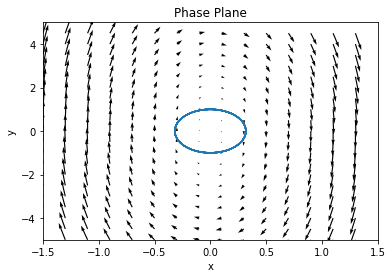

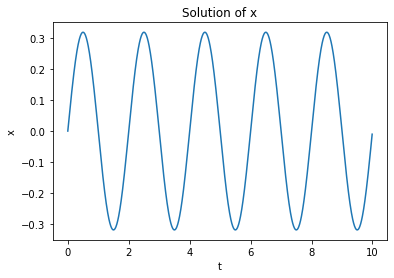

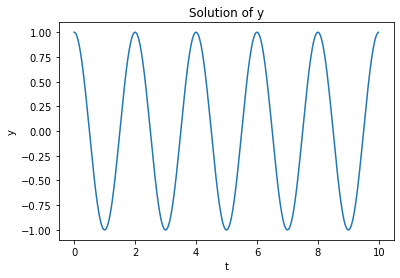

array([0.+3.14159265j, 0.-3.14159265j])

In [102]:
# what is b? --> this is the friction constant

# should I define a m (mass) variable outside of function? --> no, we assume mass = 1

# Set parameter values
k = np.square(np.pi)
b = 0

# Is a, b, c, d = y', -kx/m, x', y? --> yes

# For the model x' = y
#               y' = (-k/m)*x

# p = 0
# q = 1
# r = -k # assuming m = 1
# s = -b

xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
Tmax = 10
dt = 0.01
xinit = 0
yinit = 1

sol, t, evals = alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)
sol
evals

The eigenvalues match the period of the oscillations in this graph

### 1.2

Set $k = \pi^2$ and $b=2$. Report the eigenvalues and classify the behavior of the solutions. If oscillatory, report the period of oscillations and compare with the eigenbvalues.

eigen vals= (-1+2.9781881070693563j) (-1-2.9781881070693563j)
eigen vecs= [-0.09654799-0.28753809j -0.09654799+0.28753809j] [0.95289051+0.j 0.95289051-0.j]


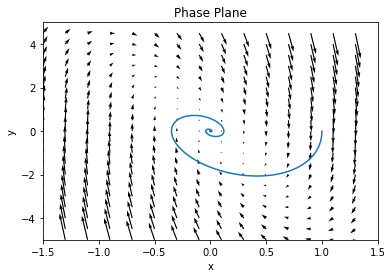

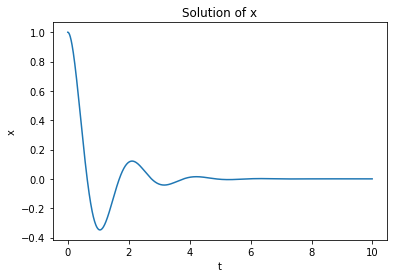

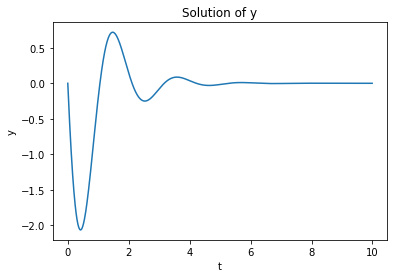

(array([[ 1.00000000e+00,  0.00000000e+00],
        [ 9.99509831e-01, -9.76995706e-02],
        [ 9.98052773e-01, -1.93369090e-01],
        ...,
        [-2.26386493e-05,  1.53239665e-04],
        [-2.11105521e-05,  1.52341971e-04],
        [-1.95920901e-05,  1.51313086e-04]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06,

In [103]:
k = np.square(np.pi)
b = 2

xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
Tmax = 10
dt = 0.01
xinit = 1
yinit = 0

alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

Initially the period of the oscillations mirror the eigenvalues but this is a stable spiral so it converges to a fixed point

### 1.3
Set $k = \pi^2$ and $b=10$. Report the eigenvalues and classify the behavior of the solutions. If oscillatory, report the period of oscillations and compare with the eigenbvalues.

eigen vals= -1.1102190808593555 -8.889780919140644
eigen vecs= [ 0.66926153 -0.1117837 ] [-0.74302692  0.99373256]


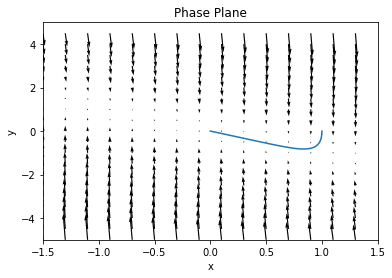

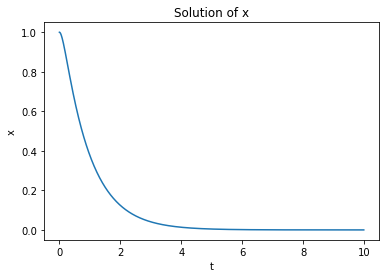

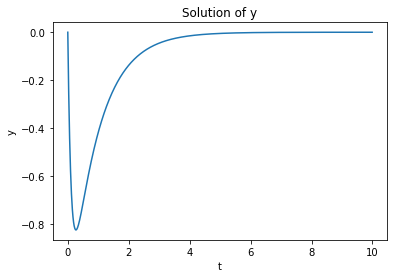

(array([[ 1.00000000e+00,  0.00000000e+00],
        [ 9.99522604e-01, -9.39062449e-02],
        [ 9.98151948e-01, -1.78787953e-01],
        ...,
        [ 1.78218821e-05, -1.97860834e-05],
        [ 1.76251690e-05, -1.95676858e-05],
        [ 1.74306266e-05, -1.93516989e-05]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06,

In [104]:
k = np.square(np.pi)
b = 10

alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

Your answers here

## Part 2: Fourier transforms

Please see example code in lab7_examples.ipynb for generating power spectra of a Fourier transform of a signal.


### 2.1
Use the output of the linear oscillator from question 1.1 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency peak and explain how it relates to the period you observed in 1.1.

eigen vals= 3.141592653589793j -3.141592653589793j
eigen vecs= [0.-0.30331447j 0.+0.30331447j] [0.95289051+0.j 0.95289051-0.j]


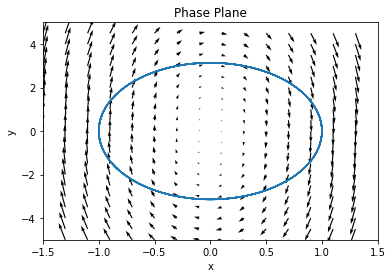

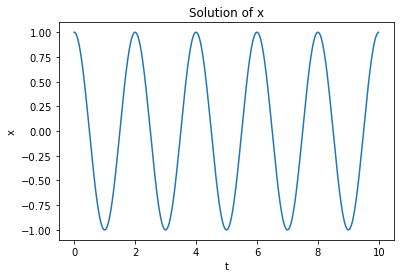

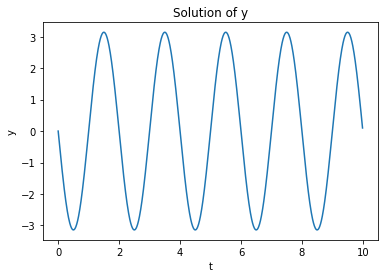

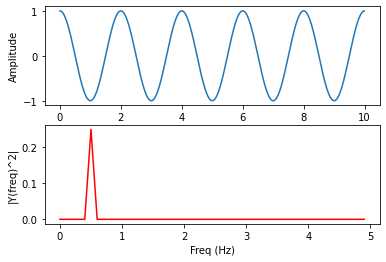

In [105]:
k = np.square(np.pi)
b = 0

xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
Tmax = 10
dt = 0.01
xinit = 1
yinit = 0

sol, t, evals = alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

signal = sol[:,0]

# frequency stuff
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Your answers here

### 2.2
Use the output of the linear oscillator from question 1.2 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency peak and explain how it relates to the period you observed in 1.2.

eigen vals= (-1+2.9781881070693563j) (-1-2.9781881070693563j)
eigen vecs= [-0.09654799-0.28753809j -0.09654799+0.28753809j] [0.95289051+0.j 0.95289051-0.j]


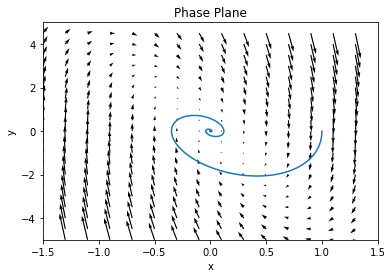

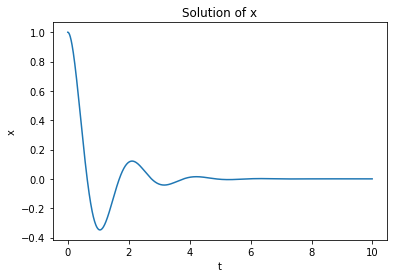

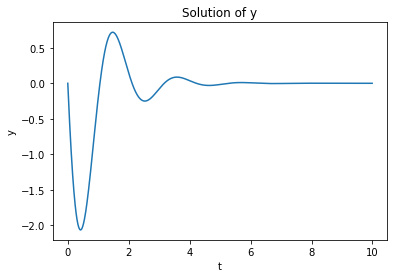

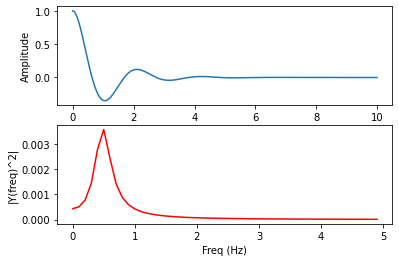

In [106]:
k = np.square(np.pi)
b = 2

xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
Tmax = 10
dt = 0.01
xinit = 1
yinit = 0

sol, t, evals = alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

signal = sol[:,0]

# frequency stuff
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Your answers here

### 2.3
Use the output of the linear oscillator from question 1.3 as the signal, compute the FFT, and plot its power spectrum. Comment on the observed frequency spectrum and explain how it relates to dynamics of the solution.

eigen vals= -1.1102190808593555 -8.889780919140644
eigen vecs= [ 0.66926153 -0.1117837 ] [-0.74302692  0.99373256]


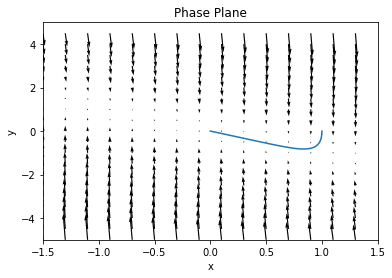

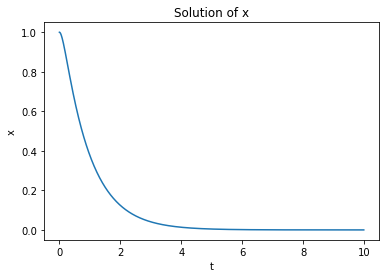

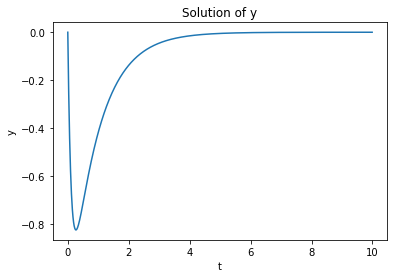

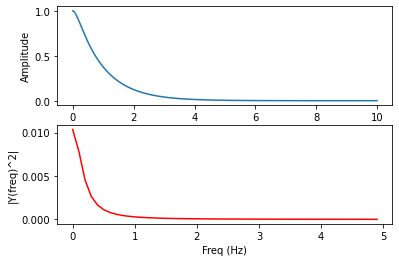

In [107]:
k = np.square(np.pi)
b = 10

xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
Tmax = 10
dt = 0.01
xinit = 1
yinit = 0

sol, t, evals = alpha_func(k, b, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

signal = sol[:,0]

# frequency stuff
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/Tmax  # two sides frequency range

num_freq = np.arange(np.ceil(n/20).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Your answers here

## Part 3: Lynx and Hare data

The following script reads in the classic data set of the pelts of lynx and hare from the Hudson Bay company over many years. This data set has been used historically to illustrate predator-prey oscillations.

In [108]:
pelts = pd.read_csv("pelt_data.csv")
pelts.head()

,Year,Hare,Lynx
0,1845,19580,30090
1,1846,19600,45150
2,1847,19610,49150
3,1848,11990,39520
4,1849,28040,21230


### 3.1
Plot the values of hare and lynx pelts contained in the pandas (data frame) pelts as a function of time (Reminder: variables in pandas are accessed with a period, e.g. pandas.variable). Plot them either in the same plot or in two windows of the same multi-figure plot.

In [109]:
pelts.dtypes

Year    int64
Hare    int64
Lynx    int64
dtype: object

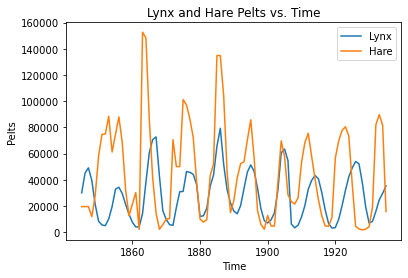

In [110]:
# Skeleton code

plt.plot(pelts["Year"], pelts["Lynx"], label="Lynx")

plt.plot(pelts["Year"], pelts["Hare"], label="Hare")

plt.title("Lynx and Hare Pelts vs. Time")
plt.xlabel("Time")
plt.ylabel("Pelts")

plt.legend()
plt.show()

### 3.2

Calculate the fft of the two variables (Hare and Lynx) and plot the power spectra in the same two-plot window. Take care with calculating the units of period and frequency and labeling the axes!

You will see that the zero-frequency peak dominates, so exclude it from the plot using array slicing.

Describe the features of the power spectra in terms of the dominant frequency peaks and level of noise. Which of the two data has the strongest dominant frequency?

In [111]:
time = np.array(pelts.Year) # x
hare = pelts.Hare # y
lynx = pelts.Lynx # y

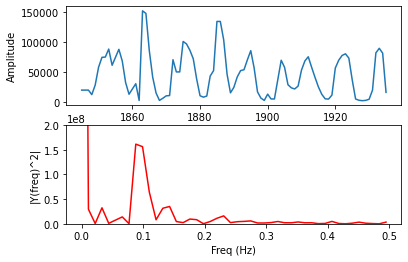

In [112]:
signal = hare

# frequency stuff
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/n  # two sides frequency range

num_freq = np.arange(np.ceil(n/2).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(time,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_ylim(0, 200000000)
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

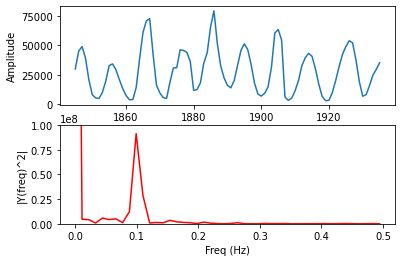

In [113]:
signal = lynx

# frequency stuff
n = len(signal) # length of the signal
k = np.arange(n) # all the frequency indices
frq = k/n  # two sides frequency range

num_freq = np.arange(np.ceil(n/2).astype(int)) # range of frequencies to plot
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(time,signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_ylim(0, 100000000)
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Your answers here